#Plotting data of an athlete

In [1]:
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 20, 14
pylab.rcParams['font.size'] = 18
import sys
sys.path.insert(0, '../triviz/')
from utils import *
from modele import *

In [2]:
T = TRICLAIRModele()

## Get Ranking of 2014

In [3]:
R=T.get_ranking_athletes(2014)

:: Calling get_ranking_athletes: Loading ranking of athletes


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/common.py:495: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x


In [4]:
R.head()

,club,id,name,points,ranking,sex
0,VAULX-EN-VELIN TRIATHLON,24880,RODRIGUEZ JOHAN,11889,1,M
1,TRIATHLON ROMANAIS PÉAGEOIS,24847,DOLLE BRICE,10183,2,M
2,RILLIEUX TRIATHLON,24908,NOASCONE KEVIN,9040,3,M
3,TEAM MERMILLOD TRIATHLON,25888,DUPONT PHILIPPE,8937,4,M
4,VALLONS DE LA TOUR TRIATHLON,24964,GAILHOT JONATHAN,8156,5,M


## Get data of one athlete (Rodriguez Johan - 2014)

### Raw data

In [5]:
P=T.get_data_athlete(24880)

:: Calling get_data_athlete: Loading data of athlete


In [6]:
P

,coeff,course,date,format,points,total
0,3,Triathlon d'Aix-les-Bains,2014-09-14,M,459,1377
1,3,Triathlon du Mont Blanc,2014-08-24,M,271,813
2,3,Triathlon de l'Alpe d'Huez,2014-07-31,M,365,1095
3,2,Triathlon des collines,2014-07-20,S,193,386
4,3,Triathlon de Thonon,2014-07-13,M,283,849
5,2,Triathlon du Lac de Machilly,2014-07-06,S - CLM individuel,299,598
6,3,Triathlon d'Annecy,2014-06-29,M,476,1428
7,3,Triathlon du Lac des Sapins,2014-06-15,M,490,1470
8,3,Triathlon de Roanne,2014-06-08,M,113,339
9,3,Triathlon de l'île Barlet,2014-06-01,M,174,522


### Get data from the planning

In [7]:
L=T.get_list_triathlons(2014)

:: Calling get_list_triathlons: Loading list of triathlons


In [8]:
L.head()

,date,name,format,link
0,2014-09-21,Triathlon de Vaulx-en-Velin,S,/triathlon-vaulx-en-velin-resultats-1833.htm
1,2014-09-21,Triathlon de Vaulx-en-Velin,XS,/triathlon-vaulx-en-velin-resultats-1834.htm
2,2014-09-14,Triathlon d'Aix-les-Bains,XS,/triathlon-aix-les-bains-resultats-1831.htm
3,2014-09-14,Triathlon d'Aix-les-Bains,M,/triathlon-aix-les-bains-resultats-1830.htm
4,2014-09-07,Triathlon de St Pierre d'Albigny,S,/triathlon-st-pierre-d-albigny-resultats-1824.htm


The variable *links* contains all the weblinks of the events held by the athlete in 2014.

In [9]:
links=sum([list(L['link'][(L['name']==course) & (L['format']==form)]) for course,form in zip(P['course'],P['format'])],[])

**Warning**: This list takes time to compute.

In [10]:
tris = [T.get_data_triathlon(l,2014) for l in links]

:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon
:: Calling get_data_triathlon: Loading data of triathlon


In [11]:
resultats = []
for trit,name,form in zip(tris,P['course'],P['format']):
    trit = trit.dropna()
    tri = pd.concat([trit.loc[:,:'Sexe'],trit.loc[:,'Scratch':].apply(normalize_col)],axis=1)
    resultat = tri[(tri['Nom']=='RODRIGUEZ JOHAN') | (tri['Nom'] == 'JOHAN RODRIGUEZ')]
    if resultat.empty: 
        pass
        #print dir(resultat)
    resultats.append(resultat.loc[:,'Scratch':])
resultats=pd.concat(resultats).reset_index()    

In [12]:
resultats=resultats.rename(columns={'index':'Place'})

In [13]:
resultats=pd.concat([P['course'],resultats],axis=1)

In [14]:
resultats = resultats.drop('Place',axis=1)
resultats = resultats.set_index('course')

In [15]:
resultats

,Scratch,Natation,Velo,Cap
course,,,,
Triathlon d'Aix-les-Bains,110.023810,103.204173,104.477318,128.758170
Triathlon du Mont Blanc,111.748952,100.823045,109.002294,122.995679
Triathlon de l'Alpe d'Huez,126.202587,113.109426,123.393435,142.203052
Triathlon des collines,111.637512,118.314425,105.958549,119.289340
Triathlon de Thonon,112.445933,115.625000,109.133946,115.837860
Triathlon du Lac de Machilly,111.682586,113.874788,107.582740,119.146919
Triathlon d'Annecy,107.696158,101.563858,105.160181,113.623327
Triathlon du Lac des Sapins,108.911215,99.286224,103.971708,127.017387
Triathlon de Roanne,109.567617,111.535049,101.179719,122.000000


## Display data

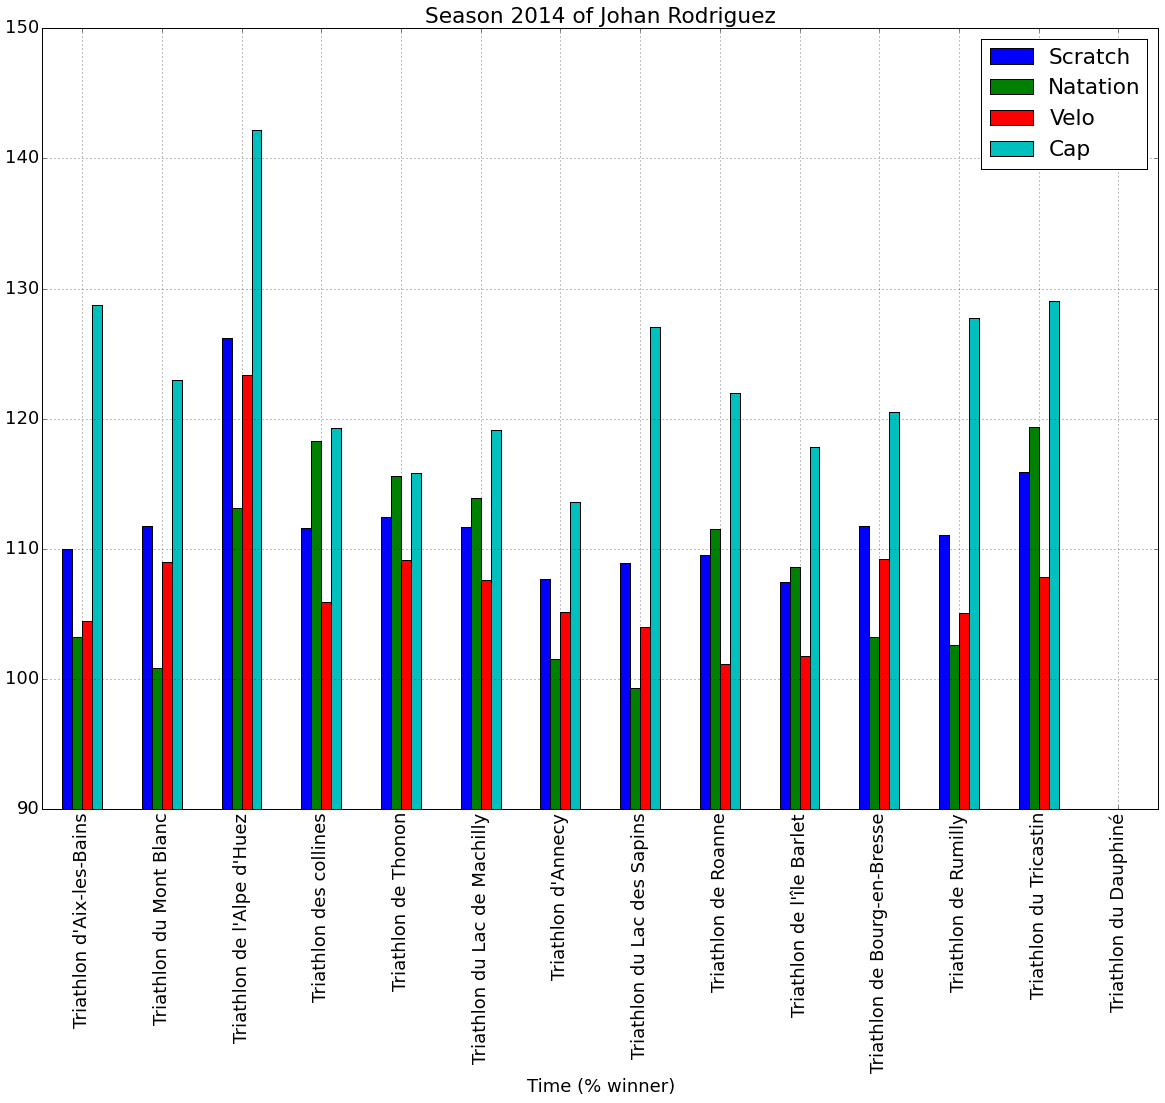

In [18]:
resultats.plot(ylim=(90,150),kind='bar',rot=90)
plt.title('Season 2014 of Johan Rodriguez')
plt.xlabel('Time (% winner)')

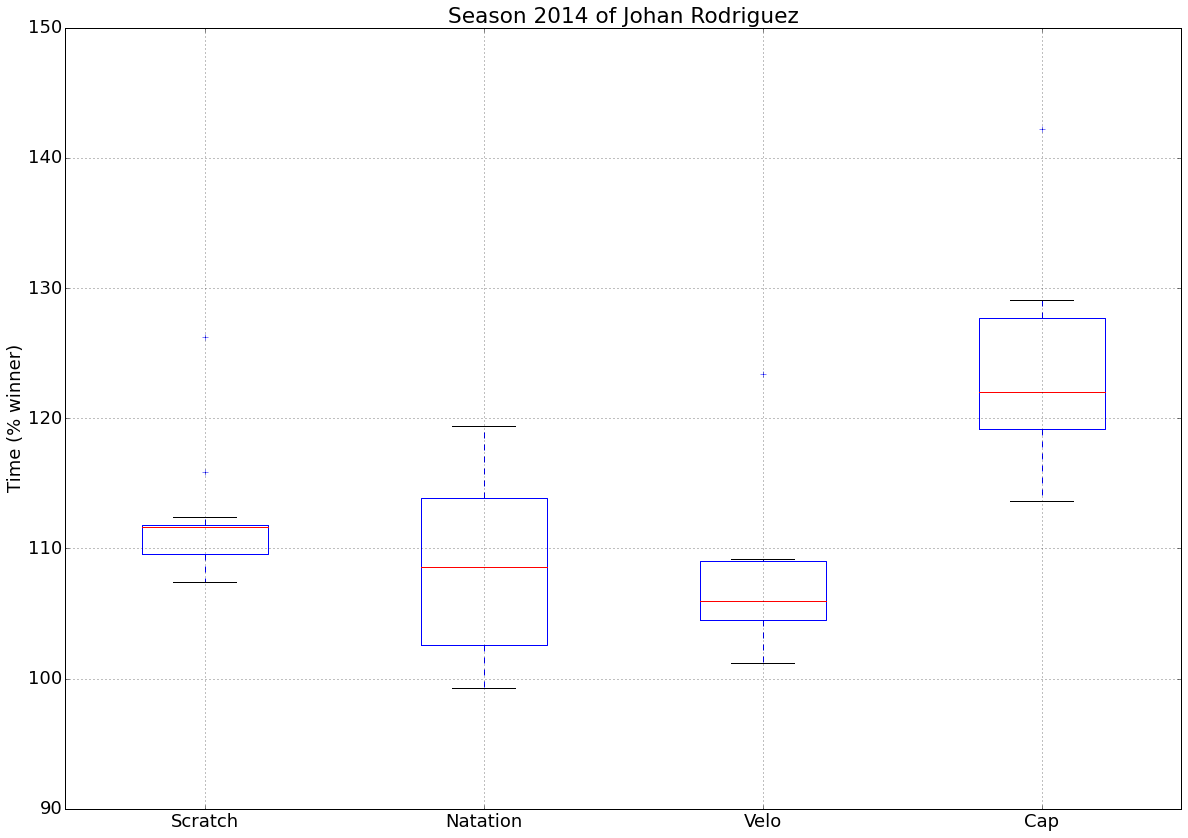

In [17]:
resultats.plot(kind='box',use_index=True)
plt.title('Season 2014 of Johan Rodriguez')
plt.ylabel('Time (% winner)')